In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('dark_background')
%matplotlib inline

In [32]:
class RoverMDP: # class for Markov Decision Process

  def __init__(self):
    # State space
    self.states = [0, 1, 2, 3] # 0 = low, 1 = med, 2 = high, 3 = top

  def startState(self): # start state of MDP
    return self.states[0]

  def isEnd(self, state): # Check if MDP has ended
    return state == self.states[3]

  def actions(self, state): # possible actions from a given state
    action_list = []
    if state != self.states[3]:
      action_list.append('slow')
      action_list.append('fast')
    return action_list

  def ProbReward(self, state, action=None): # return list of possible new states, correspondig porbs and rewards.
    newStateProbReward_list = []
    if action in self.actions(state):
      if action == 'slow':
        newStateProbReward_list.append((state+1, 3/10, -4)) # state, slow --> go next state with 0.3 prob, 4 cost
        newStateProbReward_list.append((self.states[0], 7/10, -4)) # state, slow --> drop to low state with 0.7 prob, 4 cost
      elif action == 'fast':
        newStateProbReward_list.append((state+1, 5/10, -12)) # state, fast --> go next state with 0.5 prob, 12 cost
        newStateProbReward_list.append((self.states[0], 5/10, -12)) # state, fast --> drop to low state with 0.5 prob, 12 cost
    else:
      newStateProbReward_list.append((state, 1, 0)) # terminal state i.e top
    return newStateProbReward_list

  def discount(self): # discount factor
    return 0.95

In [33]:
roverMDP = RoverMDP() # object

In [34]:
# What are the possible actions avaiable from state 0 (in) ?
roverMDP.actions(0)

['slow', 'fast']

In [35]:
# What are the possible actions avaiable from state 1 (out) ?
print(roverMDP.actions(0))
print(roverMDP.actions(1))
print(roverMDP.actions(2))
print(roverMDP.actions(3)) # top

['slow', 'fast']
['slow', 'fast']
['slow', 'fast']
[]


In [36]:
roverMDP.ProbReward(2, 'slow')

[(3, 0.3, -4), (0, 0.7, -4)]

In [37]:
roverMDP.ProbReward(1, 'fast')

[(2, 0.5, -12), (0, 0.5, -12)]

In [38]:
roverMDP.ProbReward(3) # top

[(3, 1, 0)]

In [39]:
np.random.choice(range(2), size = 1, p = [2/3, 1/3]) # python alternative for R sample

array([1])

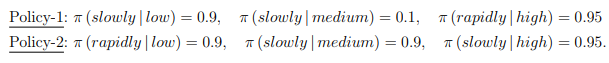

In [40]:
# A deterministic policy (what action to take in a given state?)
def policy1(roverMDP, state):
  # sampling the action
  if roverMDP.actions(state): # not top
    if state == roverMDP.states[0]: # low
      return np.random.choice(['slow', 'fast'], size = 1, p = [9/10, 1/10])[0]
    elif state == roverMDP.states[1]: # med
      return np.random.choice(['slow', 'fast'], size = 1, p = [1/10, 9/10])[0]
    else: # high
      return np.random.choice(['slow', 'fast'], size = 1, p = [5/100, 95/100])[0]

In [41]:
def policy2(roverMDP, state):
  # sampling the action
  if roverMDP.actions(state): # not top
    if state == roverMDP.states[0]: # low
      return np.random.choice(['slow', 'fast'], size = 1, p = [1/10, 9/10])[0]
    elif state == roverMDP.states[1]: # med
      return np.random.choice(['slow', 'fast'], size = 1, p = [9/10, 1/10])[0]
    else: # high
      return np.random.choice(['slow', 'fast'], size = 1, p = [95/100, 5/100])[0]

In [42]:
policy1(roverMDP, 1)

'fast'

In [43]:
policy2(roverMDP, 3) # None

In [44]:
policy2(roverMDP, 0)

'slow'

POLICY 1, Discount 0.95

In [49]:
G = 0 # cumulative reward
k = 0 # time stamp
state = roverMDP.startState() # start state
while not roverMDP.isEnd(state): # while not in terminal state
  action = policy1(roverMDP, state)
  SPR_list = roverMDP.ProbReward(state, action) # get list of tuples

  states = [tup[0] for tup in SPR_list]
  prob = [tup[1] for tup in SPR_list]
  reward = [tup[2] for tup in SPR_list]

  new_state = np.random.choice(states, size = 1, p = prob)[0] # get new state

  # add rewards with discount
  if new_state == states[0]:
    G += (roverMDP.discount() ** k) * reward[0]
    print(f'State: {state}, Action: {action}, Reward: {reward[0]}, New State {new_state}')
  else:
    G += (roverMDP.discount() ** k) * reward[1]
    print(f'State: {state}, Action: {action}, Reward {reward[1]}, New State {new_state}')

  # update current state
  state = new_state
  # update time step
  k += 1

print(G)

State: 0, Action: slow, Reward -4, New State 0
State: 0, Action: slow, Reward -4, New State 0
State: 0, Action: slow, Reward -4, New State 0
State: 0, Action: slow, Reward -4, New State 0
State: 0, Action: fast, Reward -12, New State 0
State: 0, Action: slow, Reward -4, New State 0
State: 0, Action: slow, Reward -4, New State 0
State: 0, Action: slow, Reward -4, New State 0
State: 0, Action: slow, Reward: -4, New State 1
State: 1, Action: fast, Reward -12, New State 0
State: 0, Action: slow, Reward -4, New State 0
State: 0, Action: slow, Reward -4, New State 0
State: 0, Action: slow, Reward -4, New State 0
State: 0, Action: slow, Reward -4, New State 0
State: 0, Action: slow, Reward -4, New State 0
State: 0, Action: slow, Reward -4, New State 0
State: 0, Action: slow, Reward -4, New State 0
State: 0, Action: slow, Reward -4, New State 0
State: 0, Action: slow, Reward -4, New State 0
State: 0, Action: fast, Reward: -12, New State 1
State: 1, Action: fast, Reward: -12, New State 2
State:

POLICY 2, Discount 0.95

In [50]:
G = 0 # cumulative reward
k = 0 # time stamp
state = roverMDP.startState() # start state
while not roverMDP.isEnd(state): # while not in terminal state
  action = policy2(roverMDP, state)
  SPR_list = roverMDP.ProbReward(state, action) # get list of tuples

  states = [tup[0] for tup in SPR_list]
  prob = [tup[1] for tup in SPR_list]
  reward = [tup[2] for tup in SPR_list]

  new_state = np.random.choice(states, size = 1, p = prob)[0] # get new state

  # add rewards with discount
  if new_state == states[0]:
    G += (roverMDP.discount() ** k) * reward[0]
    print(f'State: {state}, Action: {action}, Reward: {reward[0]}, New State {new_state}')
  else:
    G += (roverMDP.discount() ** k) * reward[1]
    print(f'State: {state}, Action: {action}, Reward {reward[1]}, New State {new_state}')

  # update current state
  state = new_state
  # update time step
  k += 1

print(G)

State: 0, Action: fast, Reward -12, New State 0
State: 0, Action: fast, Reward -12, New State 0
State: 0, Action: fast, Reward: -12, New State 1
State: 1, Action: slow, Reward -4, New State 0
State: 0, Action: fast, Reward: -12, New State 1
State: 1, Action: slow, Reward -4, New State 0
State: 0, Action: fast, Reward: -12, New State 1
State: 1, Action: slow, Reward -4, New State 0
State: 0, Action: fast, Reward -12, New State 0
State: 0, Action: slow, Reward -4, New State 0
State: 0, Action: fast, Reward: -12, New State 1
State: 1, Action: slow, Reward: -4, New State 2
State: 2, Action: slow, Reward -4, New State 0
State: 0, Action: fast, Reward: -12, New State 1
State: 1, Action: slow, Reward -4, New State 0
State: 0, Action: fast, Reward: -12, New State 1
State: 1, Action: slow, Reward -4, New State 0
State: 0, Action: fast, Reward: -12, New State 1
State: 1, Action: slow, Reward -4, New State 0
State: 0, Action: fast, Reward: -12, New State 1
State: 1, Action: slow, Reward -4, New S